# Lecture 13 – Data Science


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Multiple Linear Regression

Let's load in a new dataset. This is aggregate per-player data from the 2018-19 NBA season, downloaded from [Kaggle](https://www.kaggle.com/schmadam97/nba-regular-season-stats-20182019).

In [18]:
nba = pd.read_csv('C:\\Users\\MOEED\\Desktop\\Knowledge Streams\\Machine Learning\\nba18-19.csv', index_col=0)
# Drops name of index (players are ordered by rank)

In [20]:
nba.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


<br/>
We are interested in predicting the number of points (`PTS`) an athlete will score in a basketball game this season.

Suppose we want to fit a linear model by using some characteristics, or **feature**s of a player. Specifically, we'll focus on field goals, assists, and 3-point attempts.

- `FG`, the number of (2-point) field goals per game
- `AST`, the average number of assists per game, and
- `3PA`, the number of 3-point field goals attempted per game

This is how we express that model:

$$
\hat{y}
=
\theta_0 +
\theta_1 \cdot \textbf{FG} +
\theta_2 \cdot \textbf{AST} +
\theta_3 \cdot \textbf{3PA}
$$

In [130]:
# extract required Columns
df=nba[['FG','AST','3PA','PTS']]
df

,FG,AST,3PA,PTS
Rk,,,,
1,1.8,0.6,4.1,5.3
2,0.4,0.8,1.5,1.7
3,1.1,1.9,2.2,3.2
4,6.0,1.6,0.0,13.9
5,3.4,2.2,0.2,8.9
...,...,...,...,...
528,4.0,0.8,0.0,11.5
529,3.1,0.9,0.0,7.8
530,3.6,1.1,0.0,8.9


<br/><br/>
In lecture, we saw that the predictions for the entire data set $\hat{\mathbb{Y}}$ can be computed as:

$$ \Large
\hat{\mathbb{Y}} = \mathbb{X} \theta  
$$

The **design matrix** $\mathbb{X} \in \mathbb{R}^{n,d+1}$ has $n$ rows corresponding to each record in the dataset and $d+1$ columns corresponding to the original $d$ columns in the data plus an additional 1s column vector (**bias/intercept feature**).

Let's build this design matrix using Pandas:

In [150]:
# insert bias term with dataframe
df.insert(0,'Bias',1)


ValueError: cannot insert Bias, already exists

In [156]:
df.head()
df.reset_index(inplace=True)
df

,index,Rk,Bias,FG,AST,3PA,PTS
0,0,1,1,1.8,0.6,4.1,5.3
1,1,2,1,0.4,0.8,1.5,1.7
2,2,3,1,1.1,1.9,2.2,3.2
3,3,4,1,6.0,1.6,0.0,13.9
4,4,5,1,3.4,2.2,0.2,8.9
...,...,...,...,...,...,...,...
703,703,528,1,4.0,0.8,0.0,11.5
704,704,529,1,3.1,0.9,0.0,7.8
705,705,530,1,3.6,1.1,0.0,8.9
706,706,530,1,3.4,0.8,0.0,8.5


In [158]:
# the data shape
X=df[['Bias','FG','AST','3PA']]
X.head()

,Bias,FG,AST,3PA
0,1,1.8,0.6,4.1
1,1,0.4,0.8,1.5
2,1,1.1,1.9,2.2
3,1,6.0,1.6,0.0
4,1,3.4,2.2,0.2


In [146]:
X

While we're at it, let's build the $\mathbb{Y}$ vector of our true `PTS` values.

In [232]:
# For nba data
# how many observations
num_observations = df.shape[0]
print('Number of observations are:',num_observations)
# visualize few
# Assuming your dataframe is named 'df'
Y = df[['PTS']].to_numpy()
Y[:5]

Number of observations are: 708


array([[ 5.3],
       [ 1.7],
       [ 3.2],
       [13.9],
       [ 8.9]])

---
## Example prediction

Suppose we decide to pick an arbitrary parameter $\theta$:

$$\theta = \begin{bmatrix}0.50 \\ -0.14 \\ 0.65 \\ 1.52 \end{bmatrix}$$

(For those interested: I drew these from random values simulated from a standard normal distribution using `np.random.randn`.)

In [262]:
theta_arbitrary = np.array([[0.5], [-1.14], [0.65], [1.52]])
theta_arbitrary

array([[ 0.5 ],
       [-1.14],
       [ 0.65],
       [ 1.52]])

For this value of $\theta$ we can make a prediction using our model with matrix multiplication.

The `@` symbol is the matrix multiply operation and is equivalent to writing `xt.dot(theta)`.

In [ ]:
# apply the above random values on 'X' and predict 'y'


array([[ 5.07 ],
       [ 2.844],
       [ 3.825],
       [-5.3  ],
       [-1.642]])

array([[ 5.3],
       [ 1.7],
       [ 3.2],
       [13.9],
       [ 8.9]])

## Computing MSE

For Ordinary Least Squares, the average loss is MSE:

$$ \Large R(\theta) = \frac{1}{n} || \mathbb{Y} - \mathbb{X}\theta||^2_2 $$

NumPy has a handy function `np.linalg.norm` that computes the norm of a matrix (default is L2 norm).

In [272]:
theta_arbitrary = np.array([[0.5], [-1.14], [0.65], [1.52]])
def mse_nba(theta):
    """
    Y is PTS
    X is intercept, FG, AST, 3PA
    """
    # compute MSE
    return (1/n)*(np.linalg.norm(Y-X @ theta)**2)

mse_nba(theta_arbitrary)

76.52265605508474

Is this good? Is this bad? Let's compute the optimal theta and compare!

---
## Implementing Least Squares

From lecture, the Least Squares Estimate $\hat{\theta}$ is:
$$
\Large \hat{\theta} = \left( \mathbb{X}^{\top} \mathbb{X} \right)^{-1} \mathbb{X}^{\top} \mathbb{Y}
$$

While it is not as numerically stable or efficient. We can compute $\hat{\theta}$ by direction using matrix inversion. To do this, we import the `inv` function for the `numpy` linear algebra library:

In [274]:
from numpy.linalg import inv

In [ ]:
def least_squares_estimate(X, Y):
    # code here
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y)
    return

theta_hat = least_squares_estimate(X, Y)
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

In [299]:
def least_squares_estimate(X, Y):
    # code here
    theta = inv(X.T @ X) @ X.T @ Y
    return theta

theta_hat = least_squares_estimate(X, Y)
theta_hat = theta_hat.to_numpy()
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

In [301]:
print("Arbitrary theta MSE: ", mse_nba(theta_arbitrary))
print("Optimal theta MSE:"  , mse_nba(theta_hat))

Arbitrary theta MSE:  76.52265605508474
Optimal theta MSE: 0.3963133329080335


Nice!!!

---
## Making Least Squares Predictions

Now that we have estimated the model parameters $\hat{\theta}$ we can now also predict the points scored $\hat{\mathbb{Y}}$ for each of our players.

In [327]:
Y_hat = X @ theta_hat
Y_hat=Y_hat.to_numpy()
diff=Y_hat-Y
diff

array([[ 2.52231884e-01],
       [-4.75495801e-01],
       [ 6.14289704e-02],
       [ 9.91013343e-01],
       [-4.60266208e-01],
       [-9.13852071e-02],
       [-5.21891085e-02],
       [-1.70906950e-01],
       [-2.78689579e-01],
       [-5.12307343e-01],
       [-3.61994536e-01],
       [-8.36675833e-01],
       [-4.76205196e-01],
       [-1.94063531e-01],
       [ 9.19889979e-01],
       [-2.37365335e-01],
       [ 5.55434648e-02],
       [-2.91129509e-01],
       [-2.77311264e-01],
       [-1.64589471e+00],
       [-1.29253798e+00],
       [ 6.70109134e-01],
       [ 4.78274598e-01],
       [-1.90506337e-01],
       [ 1.90985522e-01],
       [-5.94503237e-02],
       [ 4.24355272e-02],
       [-7.17319489e-01],
       [ 1.65294058e+00],
       [ 1.37206053e-01],
       [-3.24942393e-01],
       [-1.04896282e-01],
       [-2.74347090e-01],
       [ 4.59164090e-02],
       [-4.53853273e-01],
       [ 1.43214027e+00],
       [ 3.10323965e-01],
       [ 7.27793719e-01],
       [-7.3

<br/>

---

## Model Performance/Diagnosing the Model

In previous lectures, we have plotted the residual vs. our single input feature $x$.

For higher dimensional regression models, we often graph the residual with respect to the fitted values $\hat{y}$.

C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


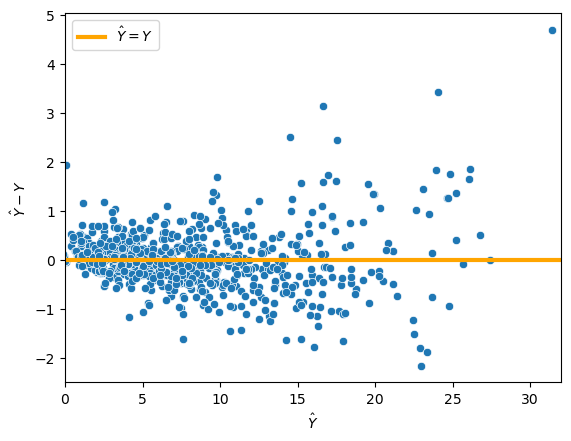

In [335]:
sns.scatterplot(x=Y_hat.flatten(), y=(Y - Y_hat).flatten())
sns.lineplot(x=[-1, 35], y=[0, 0], label="$\hat{Y}=Y$", color='orange', linewidth=3)
plt.xlabel("$\hat{Y}$")
plt.ylabel("$\hat{Y}- Y$")
plt.xlim([0, 32])
plt.show()

Overall while the residuals are roughly centered around 0 ($\hat{y} = y$), we see **heteroskedasticity**: Our regression spread is uneven, particularly as predictions get big.

## Multiple $R^2$

Let's compute the coefficient of determination, or **multiple $R^2$**, for our model.

In [350]:
# code here
from sklearn.metrics import r2_score

r_squared = r2_score(Y, Y_hat)
print(r_squared)

0.6087862763665718


That's super high!!! Wait, what's up with that?

(Hint: Basketball facts)

Let's try reducing the number of features to see how this Multiple $R^2$ metric changes.

In [338]:
# Use intercept, AST, 3PA
X = X[['Bias','AST','3PA']]
X.head()


,Bias,AST,3PA
0,1,0.6,4.1
1,1,0.8,1.5
2,1,1.9,2.2
3,1,1.6,0.0
4,1,2.2,0.2


In [340]:
theta_arbitrary = np.array([[0.5], [0.65], [1.52]])
display((X @ theta_arbitrary)[:5])

,0
0,7.122
1,3.300
2,5.079
3,1.540
4,2.234


In [342]:
mse_nba(theta_arbitrary)

23.21366883474576

In [344]:
theta_hat = least_squares_estimate(X, Y)
theta_hat = theta_hat.to_numpy()

In [346]:
Y_hat = X @ theta_hat
Y_hat = Y_hat.to_numpy()

In [352]:
r_squared = r2_score(Y, Y_hat)
print(r_squared)

0.6087862763665718


In [ ]:
# Use intercept, AST only (SLR)


0.4570055507968593

In [356]:
theta_ast_only

NameError: name 'theta_ast_only' is not defined

In [ ]:
theta_hat

array([[-0.29253798],
       [ 2.51705703],
       [ 0.05075571],
       [ 0.31307653]])

Comparing these Multiple $R^2$ together:

In [ ]:
print("(SLR) intercept, AST:    ", r2_ast_only)
print("intercept, 3PA, AST:     ", r2_ast_3pa)
print("intercept, FG, 3PA, AST: ", r2_ast_fg_3pa)

(SLR) intercept, AST:     0.4570055507968593
intercept, 3PA, AST:      0.608786276366571
intercept, FG, 3PA, AST:  0.9883162128703274


Because of how basketball is scored, knowing Field Goals `FG` *and* 3 point goal attempts `3PA` will reliably tell you how many total points a player scored in that game. This is assuming NBA players make a good number of their 3 pointers.

Side note, if you wanted to check that Multiple R^2 for Simple Linear Regression is indeed correlation coefficient $r^2$:

In [ ]:
r = np.corrcoef(nba['AST'], nba['PTS'])[0,1]
r ** 2

0.4570055507968595